In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import re

Goal: Predict the type of cuisine based on given ingredients

In [2]:
test_data = pd.read_json("../Cooking_Assets/test.json")
train_data = pd.read_json("../Cooking_Assets/train.json")

test_df = pd.DataFrame(test_data)
train_df = pd.DataFrame(train_data)


In [3]:
# from sklearn.model_selection import train_test_split
# train_data, test_data = train_test_split(df ,random_state=True, train_size=0.8)

In [4]:
train_data.head()
train_data.shape

(39774, 3)

In [5]:
test_data.head()
test_data

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."
...,...,...
9939,30246,"[large egg yolks, fresh lemon juice, sugar, bo..."
9940,36028,"[hot sauce, butter, sweet potatoes, adobo sauc..."
9941,22339,"[black pepper, salt, parmigiano reggiano chees..."
9942,42525,"[cheddar cheese, cayenne, paprika, plum tomato..."


In [6]:

ingredients = train_df.groupby("ingredients")
cuisineCount = train_df["cuisine"].value_counts()

#ingredientCount = train_df["ingredients"].value_counts()

Finding out the most common cuisine from the dataset

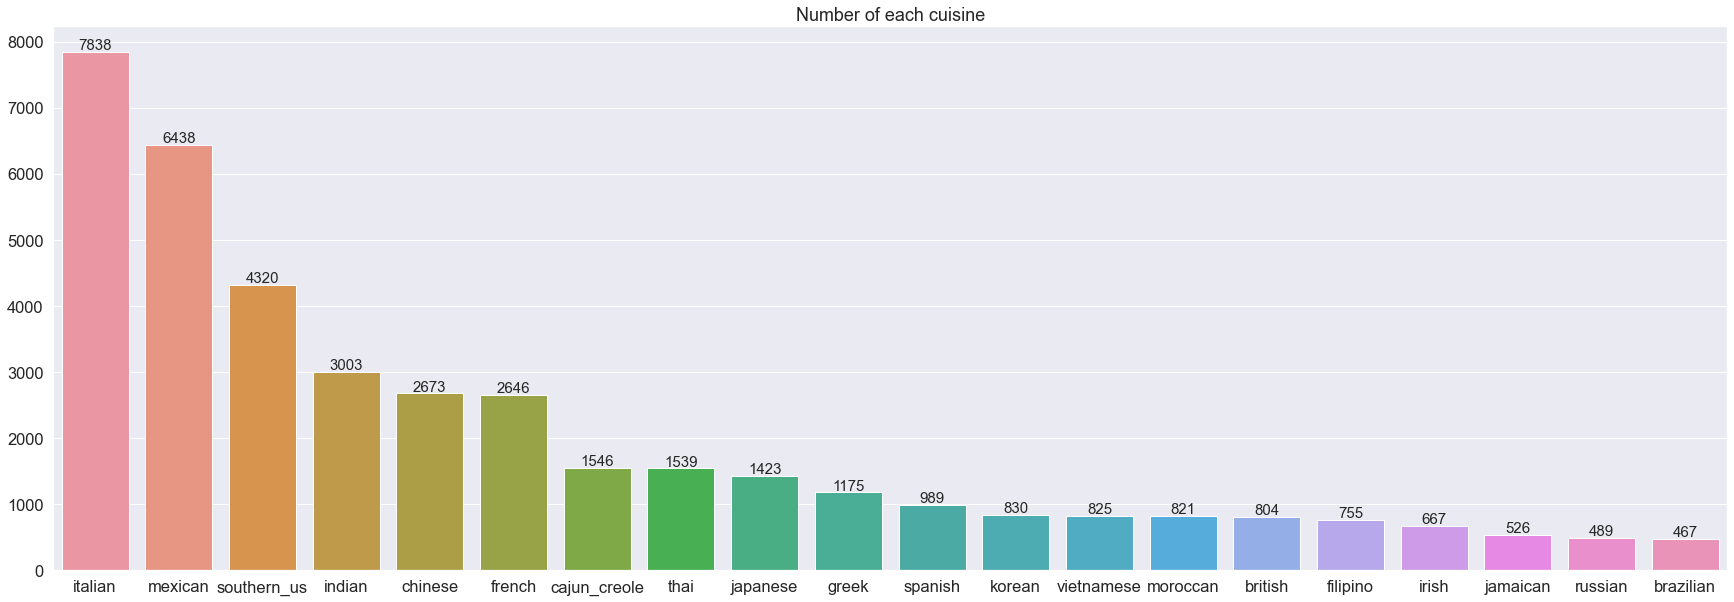

In [7]:
from matplotlib.font_manager import font_scalings


sb.set(font_scale=1.5)

figure, ax = plt.subplots(figsize = (30,10))
sb.barplot(data=train_df, x=cuisineCount.index ,y=cuisineCount.values,ax=ax)
plt.title("Number of each cuisine")


for plot in ax.patches:
    height, width, x = plot.get_height(), plot.get_width(), plot.get_x()
    xy = (x + width / 2., height + 100 )
    text = f'{height:0.0f}'
    ax.annotate(text=text, xy=xy, ha='center', va='center', fontsize= 15)



In [8]:
# def preprocess(ingredients):
#   #Converting to lowercase
#   ingredients = [[x.lower() for x in y] for y in ingredients]

#   #Removing extra white spaces
#   ingredients = [[re.sub( '\s+', ' ', x).strip() for x in y] for y in ingredients]

#   #Removing numbers
#   ingredients = [[re.sub("\d+", "", x) for x in y] for y in ingredients]

#   #Removing punctuation and special characters
#   ingredients = [[x.replace("-", " ") for x in y] for y in ingredients] 
#   ingredients = [[x.replace("&", " ") for x in y] for y in ingredients] 
#   ingredients = [[x.replace("'", " ") for x in y] for y in ingredients] 
#   ingredients = [[x.replace("''", " ") for x in y] for y in ingredients] 
#   ingredients = [[x.replace("%", " ") for x in y] for y in ingredients] 
#   ingredients = [[x.replace("!", " ") for x in y] for y in ingredients] 
#   ingredients = [[x.replace("(", " ") for x in y] for y in ingredients] 
#   ingredients = [[x.replace(")", " ") for x in y] for y in ingredients] 
#   ingredients = [[x.replace("/", " ") for x in y] for y in ingredients] 
#   ingredients = [[x.replace("/", " ") for x in y] for y in ingredients] 
#   ingredients = [[x.replace(",", " ") for x in y] for y in ingredients] 
#   ingredients = [[x.replace(".", " ") for x in y] for y in ingredients] 
#   ingredients = [[re.sub(r'[^\w\s]', '', x) for x in y] for y in ingredients]

#   #Removing units of measurement
#   units_list = ['g', 'lb', 's', 'n','oz']
#   def remove_units(word):
#     s = word.split()
#     resw  = [word for word in s if word.lower() not in units_list]
        
#     return ' '.join(resw)

#   ingredients =  [[remove_units(x) for x in y] for y in ingredients]

#   #Removing words which are not ingredients
#   ingredients = [[re.sub(r'crushed|crumbles|ground|minced|powder|chopped|sliced', '', x) for x in y] for y in ingredients]

#   return ingredients

Finding out the most common ingredient

In [9]:
def preprocess(ingredients):
  #Converting to lowercase
  ingredients = [[x.lower() for x in y] for y in ingredients]

  #Removing extra white spaces
  ingredients = [[re.sub( '\s+', ' ', x).strip() for x in y] for y in ingredients]

  #Removing numbers
  ingredients = [[re.sub("\d+", "", x) for x in y] for y in ingredients]

  #Removing punctuation and special characters
  ingredients = [[x.replace("-", " ") for x in y] for y in ingredients] 
  ingredients = [[x.replace("&", "") for x in y] for y in ingredients] 
  ingredients = [[x.replace("'", "") for x in y] for y in ingredients] 
  ingredients = [[x.replace("''", "") for x in y] for y in ingredients] 
  ingredients = [[x.replace("%", "") for x in y] for y in ingredients] 
  ingredients = [[x.replace("!", "") for x in y] for y in ingredients] 
  ingredients = [[x.replace("(", "") for x in y] for y in ingredients] 
  ingredients = [[x.replace(")", "") for x in y] for y in ingredients] 
  ingredients = [[x.replace("/", "") for x in y] for y in ingredients] 
  ingredients = [[x.replace("/", "") for x in y] for y in ingredients] 
  ingredients = [[x.replace(".", "") for x in y] for y in ingredients] 
  ingredients = [[re.sub(r'[^\w\s]', '', x) for x in y] for y in ingredients]

  #Removing units of measurement
  units_list = ['g', 'lb', 's', 'n','oz']
  def remove_units(word):
    s = word.split()
    resw  = [word for word in s if word.lower() not in units_list]
        
    return ' '.join(resw)

  ingredients =  [[remove_units(x) for x in y] for y in ingredients]

  #Removing words which are not ingredients
  ingredients = [[re.sub(r'crushed|crumbles|ground|minced|powder|chopped|sliced', '', x) for x in y] for y in ingredients]

  return ingredients

In [10]:


# ingredients = []
# ingredients_test = []
# for ingredientArray in train_df["ingredients"]:
#     for ingredient in ingredientArray:
#         ingredient = ingredient.lower() #Standardise into lower case
#         ingredient = ingredient.strip() #Remove white spaces if any
#         ingredient = ingredient.replace("-", " ")
#         ingredient = ingredient.replace(".", " ")
#         ingredient = ingredient.replace("&", " ")
#         ingredient = ingredient.replace("'", " ")
#         ingredient = ingredient.replace("!", " ")
#         ingredient = ingredient.replace("(", " ")
#         ingredient = ingredient.replace(")", " ")
#         ingredient = ingredient.replace("/", " ")
#         ingredient = ingredient.replace(",", " ")
#         ingredients.append(ingredient)


# for ingredientArray in test_df["ingredients"]:
#     for ingredient in ingredientArray:
#         ingredient = ingredient.lower() #Standardise into lower case
#         ingredient = ingredient.strip() #Remove white spaces if any
#         ingredient = ingredient.replace("-", " ")
#         ingredient = ingredient.replace(".", " ")
#         ingredient = ingredient.replace("&", " ")
#         ingredient = ingredient.replace("'", " ")
#         ingredient = ingredient.replace("!", " ")
#         ingredient = ingredient.replace("(", " ")
#         ingredient = ingredient.replace(")", " ")
#         ingredient = ingredient.replace("/", " ")
#         ingredient = ingredient.replace(",", " ")
#         ingredients_test.append(ingredient)

# ingredientCount_df = pd.Series(ingredients).value_counts().to_frame().head(5)
# ingredientCount_df.rename(columns={0:'value'}, inplace=True)
# figure2, ax2 = plt.subplots(figsize = (30,10))
# sb.barplot(data = ingredientCount_df,x=ingredientCount_df.index,y='value',ax=ax2)
# plt.title("Common ingredients")  

# for plot in ax2.patches:
#     height, width, x = plot.get_height(), plot.get_width(), plot.get_x()
#     xy = (x + width / 2, height /2 )
#     text = f'{height:0.0f}'
#     ax2.annotate(text=text, xy=xy, ha='center', va='center', fontsize= 30)



In [11]:

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

Preprocessing

In [12]:
train_df["ingredients"] = preprocess(train_df["ingredients"])
test_df["ingredients"] = preprocess(test_df["ingredients"])

In [13]:
train_df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, pepper, salt, tomatoes, black ..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[kraft zesty italian dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, garlic, ste..."


In [14]:
test_df

,id,ingredients
0,18009,"[baking , eggs, all purpose flour, raisins, mi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file , smoked sausage, okra, shrim..."
4,35687,"[ black pepper, salt, sausage casings, leeks, ..."
...,...,...
9939,30246,"[large egg yolks, fresh lemon juice, sugar, bo..."
9940,36028,"[hot sauce, butter, sweet potatoes, adobo sauc..."
9941,22339,"[black pepper, salt, parmigiano reggiano chees..."
9942,42525,"[cheddar cheese, cayenne, paprika, plum tomato..."


In [15]:
# train_df["ingredients"] = train_df["ingredients"].astype(str).str.lower()
# train_df["ingredients"] = train_df["ingredients"].astype(str).str.strip()
# train_df["cuisine"] = train_df["cuisine"].str.lower()
# train_df["cuisine"] = train_df["cuisine"].str.strip()
# test_df["ingredients"] = test_df["ingredients"].astype(str).str.lower()
# test_df["ingredients"] = test_df["ingredients"].astype(str).str.strip()



In [16]:
le = LabelEncoder()

y = le.fit_transform(train_df["cuisine"])
list(le.inverse_transform(y))


['greek',
 'southern_us',
 'filipino',
 'indian',
 'indian',
 'jamaican',
 'spanish',
 'italian',
 'mexican',
 'italian',
 'italian',
 'chinese',
 'italian',
 'mexican',
 'italian',
 'indian',
 'british',
 'italian',
 'thai',
 'vietnamese',
 'thai',
 'mexican',
 'southern_us',
 'chinese',
 'italian',
 'chinese',
 'cajun_creole',
 'italian',
 'chinese',
 'mexican',
 'italian',
 'cajun_creole',
 'mexican',
 'thai',
 'italian',
 'cajun_creole',
 'italian',
 'filipino',
 'southern_us',
 'southern_us',
 'italian',
 'brazilian',
 'mexican',
 'indian',
 'mexican',
 'chinese',
 'french',
 'southern_us',
 'southern_us',
 'southern_us',
 'japanese',
 'southern_us',
 'italian',
 'southern_us',
 'italian',
 'jamaican',
 'japanese',
 'indian',
 'italian',
 'irish',
 'thai',
 'thai',
 'indian',
 'jamaican',
 'italian',
 'thai',
 'korean',
 'french',
 'french',
 'southern_us',
 'spanish',
 'indian',
 'moroccan',
 'italian',
 'italian',
 'moroccan',
 'moroccan',
 'vietnamese',
 'japanese',
 'mexican',

In [17]:
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(train_df["ingredients"])

mlb.classes_
mlb_test = MultiLabelBinarizer(classes=mlb.classes_)
X_test = mlb_test.fit_transform(test_df["ingredients"])


c:\Users\sahas\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:860: UserWarning: unknown class(es) [' cacao', ' flax', ' lemongrass', ' macadamias', ' pork fat', ' ritz crackers', 'activ dry quick rise yeast', 'alaskan halibut', 'alfredostyle pasta sauce', 'alouette', 'amaranth seeds', 'american eggplant', 'american long grain rice', 'anardana', 'angelica', 'anise flavoring', 'asian chile sauce with garlic', 'asian herb', 'ataulfo', 'baby octopus', 'baked potato', 'banana chips', 'banana pudding', 'banh trang', 'base sauce', 'beef fat', 'beef strips', 'beluga caviar', 'bertolli olive oil garlic sauc', 'bertolli vidalia onion with roast garlic sauc', 'best foods mayonnaise dressing with extra virgin olive oil', 'bitter chocolate', 'bitter orange juice', 'black chickpeas', 'black currant', 'black quinoa', 'black sticky rice', 'blended whiskey', 'blueberry jam', 'bluefish', 'boiler', 'boneless beef bottom round roast', 'boneless beef top round steak', 'boneless flank steak', '

In [18]:
train_df["ingredients"]

0        [romaine lettuce, black olives, grape tomatoes...
1        [plain flour,  pepper, salt, tomatoes,  black ...
2        [eggs, pepper, salt, mayonaise, cooking oil, g...
3                      [water, vegetable oil, wheat, salt]
4        [black pepper, shallots, cornflour, cayenne pe...
                               ...                        
39769    [light brown sugar, granulated sugar, butter, ...
39770    [kraft zesty italian dressing, purple onion, b...
39771    [eggs, citrus fruit, raisins, sourdough starte...
39772    [boneless chicken skinless thigh,  garlic, ste...
39773    [green chile, jalapeno chilies, onions,  black...
Name: ingredients, Length: 39774, dtype: object

In [353]:
# svc = SVC()
# svc_train = svc.fit(X,y)

In [ ]:
# svc_train.score(X,y)

0.30436968874138887

In [19]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, y)

BernoulliNB()

In [20]:
clf.predict(X_test)
type_array = le.inverse_transform(clf.predict(X_test))
type_array
clf.score(X,y)


0.7431739327198672

In [24]:
prediction_df = pd.concat([test_data["id"], pd.DataFrame(type_array)], axis=1)
prediction_df.sort_values(by=['id'])


,id,0
4987,5,mexican
9232,7,indian
9638,11,thai
4927,12,southern_us
3280,13,southern_us
...,...,...
5260,49698,french
5307,49699,mexican
4642,49705,italian
6467,49711,british


Error-Correcting Output Coding

In [25]:
prediction_df


,id,0
0,18009,southern_us
1,28583,southern_us
2,41580,italian
3,29752,cajun_creole
4,35687,italian
...,...,...
9939,30246,french
9940,36028,southern_us
9941,22339,italian
9942,42525,southern_us


In [26]:
prediction_df = prediction_df.rename(columns={0: "cuisine"})
compression_opts = dict(method='zip',
                        archive_name='cooking.csv')  
prediction_df.to_csv('cooking.zip', index=False,
          compression=compression_opts)  

In [ ]:
# prediction_array = np.vstack(test_data["id"],type_array)
prediction_df = pd.concat([test_data["id"], pd.DataFrame(type_array)], axis=1)
prediction_df.sort_values(by=['id'])


,id,0
4987,5,chinese
9232,7,mexican
9638,11,mexican
4927,12,italian
3280,13,italian
...,...,...
5260,49698,italian
5307,49699,mexican
4642,49705,southern_us
6467,49711,mexican


In [ ]:
prediction_df[0]

0       southern_us
1           italian
2           italian
3           italian
4           italian
           ...     
9939        mexican
9940         french
9941        italian
9942    southern_us
9943        italian
Name: 0, Length: 9944, dtype: object

In [ ]:
sample_sub = pd.DataFrame(pd.read_csv("../Cooking_Assets/sample_submission.csv"))


In [ ]:
from sklearn.metrics import accuracy_score

# accuracy = accuracy_score(y_pred=prediction_df[0],y_true=sample_sub["cuisine"])
# accuracy*100

49.9195494770716

Prediciting the cuisine from given ingredients

In [ ]:
# import pickle
# filename = 'trained_model.sav'

# pickle.dump(svc_train, open(filename, 'wb'))
# pickle.dump(Prediction, open('prediction_array', 'wb'))

In [ ]:
# import pickle
# loaded_model = pickle.load(open("finalized_model.sav", 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [ ]:
prediction_df = prediction_df.rename(columns={0: "cuisine"})
compression_opts = dict(method='zip',
                        archive_name='cooking.csv')  
prediction_df.to_csv('cooking.zip', index=False,
          compression=compression_opts)  

In [ ]:
prediction_df

,id,cuisine
0,18009,southern_us
1,28583,italian
2,41580,italian
3,29752,italian
4,35687,italian
...,...,...
9939,30246,mexican
9940,36028,french
9941,22339,italian
9942,42525,southern_us
